In [2]:
import numpy as np

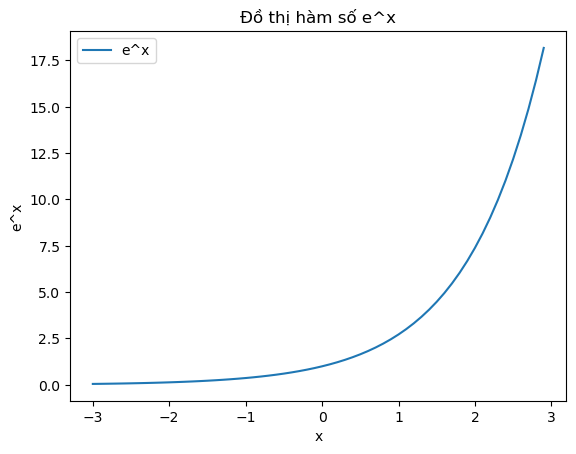

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu x từ -5 đến 5 với bước 0.1
x = np.arange(-3, 3, 0.1)

# Tính giá trị của hàm số e^x cho từng giá trị x
y = np.exp(x)

# Vẽ đồ thị hàm số e^x
plt.plot(x, y, label='e^x')

# Đặt nhãn cho các trục
plt.xlabel('x')
plt.ylabel('e^x')

# Đặt tiêu đề cho đồ thị
plt.title('Đồ thị hàm số e^x')

# Hiển thị chú thích
plt.legend()

# Hiển thị đồ thị
plt.show()


In [4]:
z = np.array([5, 2, 4, 5])

In [5]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis = 0)
softmax(z)

array([0.41362198, 0.02059303, 0.15216302, 0.41362198])

In [6]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [7]:
y_hat = [[0.6, 0.3, 0.05, 0.05], [0.3, 0.1, 0.5, 0.1]]
y_true = [[1, 0, 0, 0], [0, 1, 0, 0]]

In [8]:
loss = CategoricalCrossentropy()
loss(y_true, y_hat)

<tf.Tensor: shape=(), dtype=float32, numpy=1.4067054>

In [9]:
- 1/2 * (np.log(0.6) + np.log(0.1))

1.4067053583800182

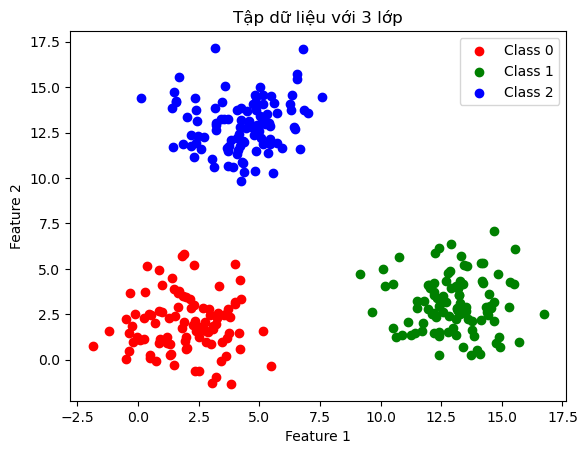

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Tạo tập dữ liệu giả định với 3 lớp
num_samples = 300
centers = [(2, 2), (13, 3), (4, 13)]
X, y = make_blobs(n_samples=num_samples, centers=centers, random_state=None, cluster_std=1.5)

# Mảng các màu tương ứng với từng lớp
colors = ['r', 'g', 'b']

# Hiển thị tập dữ liệu
for cls in range(len(centers)):
    class_samples = X[y == cls]
    plt.scatter(class_samples[:, 0], class_samples[:, 1], c=colors[cls], label=f'Class {cls}')

# Đặt nhãn cho trục x và y
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Đặt tiêu đề cho đồ thị
plt.title('Tập dữ liệu với 3 lớp')

# Hiển thị chú thích với tên các lớp
plt.legend()

# Hiển thị đồ thị
plt.show()


In [11]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
split_ratio = 0.8
split_index = int(split_ratio * num_samples)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [15]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Tránh trường hợp số quá lớn gây ra overflow
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def one_hot_encode(y, num_classes):
    num_samples = len(y)
    one_hot = np.zeros((num_samples, num_classes))

    for i in range(num_samples):
        class_index = y[i]
        one_hot[i, class_index] = 1

    return one_hot

def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-9  # Tránh trường hợp log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

def softmax_regression_train(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape
    num_classes = len(np.unique(y))
    
    # Chuyển nhãn thành dạng one-hot encode
    y_one_hot = one_hot_encode(y, num_classes)
    
    # Khởi tạo các trọng số ngẫu nhiên
#     np.random.seed(0)
    
    weights = np.random.randn(num_features, num_classes)
    bias = np.zeros((1, num_classes))
    
    # Huấn luyện mô hình
    for epoch in range(num_epochs):
        # Lan truyền thuận
        scores = np.dot(X, weights) + bias
        y_pred = softmax(scores)
        
        # Tính gradient và cập nhật trọng số
        dW = (1 / num_samples) * np.dot(X.T, (y_pred - y_one_hot))
        db = (1 / num_samples) * np.sum(y_pred - y_one_hot, axis=0, keepdims=True)
        
        weights -= learning_rate * dW
        bias -= learning_rate * db
        
        # Tính loss để theo dõi quá trình huấn luyện
        loss = cross_entropy_loss(y_pred, y_one_hot)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")
    
    return weights, bias

def predict(X, weights, bias):
    scores = np.dot(X, weights) + bias
    probabilities = softmax(scores)
    return np.argmax(probabilities, axis=1)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Ví dụ về sử dụng mô hình Softmax Regression
# Giả sử bạn đã có dữ liệu huấn luyện X_train và nhãn y_train tương ứng

# Xác định các tham số huấn luyện
learning_rate = 0.01
num_epochs = 10000

# Huấn luyện mô hình
weights, bias = softmax_regression_train(X_train, y_train, learning_rate, num_epochs)

# Dự đoán nhãn cho dữ liệu kiểm tra X_test
y_test_pred = predict(X_test, weights, bias)

# Tính toán độ chính xác của mô hình trên dữ liệu kiểm tra
acc = accuracy(y_test, y_test_pred)
print(f"Độ chính xác trên dữ liệu kiểm tra: {acc:.2f}")


Epoch 1/10000, Loss: 1.4924
Epoch 2/10000, Loss: 1.4713
Epoch 3/10000, Loss: 1.4532
Epoch 4/10000, Loss: 1.4370
Epoch 5/10000, Loss: 1.4219
Epoch 6/10000, Loss: 1.4076
Epoch 7/10000, Loss: 1.3939
Epoch 8/10000, Loss: 1.3806
Epoch 9/10000, Loss: 1.3675
Epoch 10/10000, Loss: 1.3547
Epoch 11/10000, Loss: 1.3420
Epoch 12/10000, Loss: 1.3295
Epoch 13/10000, Loss: 1.3171
Epoch 14/10000, Loss: 1.3048
Epoch 15/10000, Loss: 1.2925
Epoch 16/10000, Loss: 1.2803
Epoch 17/10000, Loss: 1.2682
Epoch 18/10000, Loss: 1.2561
Epoch 19/10000, Loss: 1.2441
Epoch 20/10000, Loss: 1.2321
Epoch 21/10000, Loss: 1.2202
Epoch 22/10000, Loss: 1.2083
Epoch 23/10000, Loss: 1.1964
Epoch 24/10000, Loss: 1.1847
Epoch 25/10000, Loss: 1.1729
Epoch 26/10000, Loss: 1.1612
Epoch 27/10000, Loss: 1.1495
Epoch 28/10000, Loss: 1.1379
Epoch 29/10000, Loss: 1.1263
Epoch 30/10000, Loss: 1.1147
Epoch 31/10000, Loss: 1.1032
Epoch 32/10000, Loss: 1.0918
Epoch 33/10000, Loss: 1.0804
Epoch 34/10000, Loss: 1.0690
Epoch 35/10000, Loss: 1

Epoch 1978/10000, Loss: 0.1105
Epoch 1979/10000, Loss: 0.1105
Epoch 1980/10000, Loss: 0.1105
Epoch 1981/10000, Loss: 0.1104
Epoch 1982/10000, Loss: 0.1104
Epoch 1983/10000, Loss: 0.1103
Epoch 1984/10000, Loss: 0.1103
Epoch 1985/10000, Loss: 0.1102
Epoch 1986/10000, Loss: 0.1102
Epoch 1987/10000, Loss: 0.1102
Epoch 1988/10000, Loss: 0.1101
Epoch 1989/10000, Loss: 0.1101
Epoch 1990/10000, Loss: 0.1100
Epoch 1991/10000, Loss: 0.1100
Epoch 1992/10000, Loss: 0.1099
Epoch 1993/10000, Loss: 0.1099
Epoch 1994/10000, Loss: 0.1099
Epoch 1995/10000, Loss: 0.1098
Epoch 1996/10000, Loss: 0.1098
Epoch 1997/10000, Loss: 0.1097
Epoch 1998/10000, Loss: 0.1097
Epoch 1999/10000, Loss: 0.1097
Epoch 2000/10000, Loss: 0.1096
Epoch 2001/10000, Loss: 0.1096
Epoch 2002/10000, Loss: 0.1095
Epoch 2003/10000, Loss: 0.1095
Epoch 2004/10000, Loss: 0.1095
Epoch 2005/10000, Loss: 0.1094
Epoch 2006/10000, Loss: 0.1094
Epoch 2007/10000, Loss: 0.1093
Epoch 2008/10000, Loss: 0.1093
Epoch 2009/10000, Loss: 0.1092
Epoch 20

Epoch 3841/10000, Loss: 0.0652
Epoch 3842/10000, Loss: 0.0652
Epoch 3843/10000, Loss: 0.0652
Epoch 3844/10000, Loss: 0.0652
Epoch 3845/10000, Loss: 0.0652
Epoch 3846/10000, Loss: 0.0652
Epoch 3847/10000, Loss: 0.0652
Epoch 3848/10000, Loss: 0.0651
Epoch 3849/10000, Loss: 0.0651
Epoch 3850/10000, Loss: 0.0651
Epoch 3851/10000, Loss: 0.0651
Epoch 3852/10000, Loss: 0.0651
Epoch 3853/10000, Loss: 0.0651
Epoch 3854/10000, Loss: 0.0651
Epoch 3855/10000, Loss: 0.0650
Epoch 3856/10000, Loss: 0.0650
Epoch 3857/10000, Loss: 0.0650
Epoch 3858/10000, Loss: 0.0650
Epoch 3859/10000, Loss: 0.0650
Epoch 3860/10000, Loss: 0.0650
Epoch 3861/10000, Loss: 0.0650
Epoch 3862/10000, Loss: 0.0650
Epoch 3863/10000, Loss: 0.0649
Epoch 3864/10000, Loss: 0.0649
Epoch 3865/10000, Loss: 0.0649
Epoch 3866/10000, Loss: 0.0649
Epoch 3867/10000, Loss: 0.0649
Epoch 3868/10000, Loss: 0.0649
Epoch 3869/10000, Loss: 0.0649
Epoch 3870/10000, Loss: 0.0648
Epoch 3871/10000, Loss: 0.0648
Epoch 3872/10000, Loss: 0.0648
Epoch 38

Epoch 6000/10000, Loss: 0.0450
Epoch 6001/10000, Loss: 0.0450
Epoch 6002/10000, Loss: 0.0450
Epoch 6003/10000, Loss: 0.0450
Epoch 6004/10000, Loss: 0.0450
Epoch 6005/10000, Loss: 0.0450
Epoch 6006/10000, Loss: 0.0450
Epoch 6007/10000, Loss: 0.0450
Epoch 6008/10000, Loss: 0.0450
Epoch 6009/10000, Loss: 0.0449
Epoch 6010/10000, Loss: 0.0449
Epoch 6011/10000, Loss: 0.0449
Epoch 6012/10000, Loss: 0.0449
Epoch 6013/10000, Loss: 0.0449
Epoch 6014/10000, Loss: 0.0449
Epoch 6015/10000, Loss: 0.0449
Epoch 6016/10000, Loss: 0.0449
Epoch 6017/10000, Loss: 0.0449
Epoch 6018/10000, Loss: 0.0449
Epoch 6019/10000, Loss: 0.0449
Epoch 6020/10000, Loss: 0.0449
Epoch 6021/10000, Loss: 0.0449
Epoch 6022/10000, Loss: 0.0449
Epoch 6023/10000, Loss: 0.0449
Epoch 6024/10000, Loss: 0.0449
Epoch 6025/10000, Loss: 0.0448
Epoch 6026/10000, Loss: 0.0448
Epoch 6027/10000, Loss: 0.0448
Epoch 6028/10000, Loss: 0.0448
Epoch 6029/10000, Loss: 0.0448
Epoch 6030/10000, Loss: 0.0448
Epoch 6031/10000, Loss: 0.0448
Epoch 60

Epoch 8024/10000, Loss: 0.0352
Epoch 8025/10000, Loss: 0.0352
Epoch 8026/10000, Loss: 0.0352
Epoch 8027/10000, Loss: 0.0352
Epoch 8028/10000, Loss: 0.0352
Epoch 8029/10000, Loss: 0.0352
Epoch 8030/10000, Loss: 0.0352
Epoch 8031/10000, Loss: 0.0352
Epoch 8032/10000, Loss: 0.0352
Epoch 8033/10000, Loss: 0.0352
Epoch 8034/10000, Loss: 0.0352
Epoch 8035/10000, Loss: 0.0352
Epoch 8036/10000, Loss: 0.0352
Epoch 8037/10000, Loss: 0.0352
Epoch 8038/10000, Loss: 0.0352
Epoch 8039/10000, Loss: 0.0352
Epoch 8040/10000, Loss: 0.0352
Epoch 8041/10000, Loss: 0.0352
Epoch 8042/10000, Loss: 0.0352
Epoch 8043/10000, Loss: 0.0352
Epoch 8044/10000, Loss: 0.0352
Epoch 8045/10000, Loss: 0.0352
Epoch 8046/10000, Loss: 0.0352
Epoch 8047/10000, Loss: 0.0352
Epoch 8048/10000, Loss: 0.0352
Epoch 8049/10000, Loss: 0.0352
Epoch 8050/10000, Loss: 0.0351
Epoch 8051/10000, Loss: 0.0351
Epoch 8052/10000, Loss: 0.0351
Epoch 8053/10000, Loss: 0.0351
Epoch 8054/10000, Loss: 0.0351
Epoch 8055/10000, Loss: 0.0351
Epoch 80

Epoch 9839/10000, Loss: 0.0297
Epoch 9840/10000, Loss: 0.0297
Epoch 9841/10000, Loss: 0.0297
Epoch 9842/10000, Loss: 0.0297
Epoch 9843/10000, Loss: 0.0297
Epoch 9844/10000, Loss: 0.0297
Epoch 9845/10000, Loss: 0.0297
Epoch 9846/10000, Loss: 0.0297
Epoch 9847/10000, Loss: 0.0297
Epoch 9848/10000, Loss: 0.0297
Epoch 9849/10000, Loss: 0.0297
Epoch 9850/10000, Loss: 0.0297
Epoch 9851/10000, Loss: 0.0296
Epoch 9852/10000, Loss: 0.0296
Epoch 9853/10000, Loss: 0.0296
Epoch 9854/10000, Loss: 0.0296
Epoch 9855/10000, Loss: 0.0296
Epoch 9856/10000, Loss: 0.0296
Epoch 9857/10000, Loss: 0.0296
Epoch 9858/10000, Loss: 0.0296
Epoch 9859/10000, Loss: 0.0296
Epoch 9860/10000, Loss: 0.0296
Epoch 9861/10000, Loss: 0.0296
Epoch 9862/10000, Loss: 0.0296
Epoch 9863/10000, Loss: 0.0296
Epoch 9864/10000, Loss: 0.0296
Epoch 9865/10000, Loss: 0.0296
Epoch 9866/10000, Loss: 0.0296
Epoch 9867/10000, Loss: 0.0296
Epoch 9868/10000, Loss: 0.0296
Epoch 9869/10000, Loss: 0.0296
Epoch 9870/10000, Loss: 0.0296
Epoch 98

Epoch 1/20000, Loss: 7.8144
Epoch 2/20000, Loss: 7.7673
Epoch 3/20000, Loss: 7.7211
Epoch 4/20000, Loss: 7.6759
Epoch 5/20000, Loss: 7.6317
Epoch 6/20000, Loss: 7.5889
Epoch 7/20000, Loss: 7.5477
Epoch 8/20000, Loss: 7.5086
Epoch 9/20000, Loss: 7.4721
Epoch 10/20000, Loss: 7.4390
Epoch 11/20000, Loss: 7.4103
Epoch 12/20000, Loss: 7.3868
Epoch 13/20000, Loss: 7.3686
Epoch 14/20000, Loss: 7.3552
Epoch 15/20000, Loss: 7.3457
Epoch 16/20000, Loss: 7.3386
Epoch 17/20000, Loss: 7.3308
Epoch 18/20000, Loss: 7.3159
Epoch 19/20000, Loss: 7.2874
Epoch 20/20000, Loss: 7.2492
Epoch 21/20000, Loss: 7.1725
Epoch 22/20000, Loss: 7.0616
Epoch 23/20000, Loss: 6.9180
Epoch 24/20000, Loss: 6.7208
Epoch 25/20000, Loss: 6.4776
Epoch 26/20000, Loss: 6.2006
Epoch 27/20000, Loss: 5.9081
Epoch 28/20000, Loss: 5.6125
Epoch 29/20000, Loss: 5.3131
Epoch 30/20000, Loss: 5.0168
Epoch 31/20000, Loss: 4.7256
Epoch 32/20000, Loss: 4.4405
Epoch 33/20000, Loss: 4.1619
Epoch 34/20000, Loss: 3.8904
Epoch 35/20000, Loss: 3

Epoch 1906/20000, Loss: 0.1182
Epoch 1907/20000, Loss: 0.1181
Epoch 1908/20000, Loss: 0.1181
Epoch 1909/20000, Loss: 0.1180
Epoch 1910/20000, Loss: 0.1180
Epoch 1911/20000, Loss: 0.1179
Epoch 1912/20000, Loss: 0.1179
Epoch 1913/20000, Loss: 0.1178
Epoch 1914/20000, Loss: 0.1178
Epoch 1915/20000, Loss: 0.1177
Epoch 1916/20000, Loss: 0.1177
Epoch 1917/20000, Loss: 0.1176
Epoch 1918/20000, Loss: 0.1176
Epoch 1919/20000, Loss: 0.1175
Epoch 1920/20000, Loss: 0.1175
Epoch 1921/20000, Loss: 0.1174
Epoch 1922/20000, Loss: 0.1174
Epoch 1923/20000, Loss: 0.1173
Epoch 1924/20000, Loss: 0.1173
Epoch 1925/20000, Loss: 0.1172
Epoch 1926/20000, Loss: 0.1172
Epoch 1927/20000, Loss: 0.1172
Epoch 1928/20000, Loss: 0.1171
Epoch 1929/20000, Loss: 0.1171
Epoch 1930/20000, Loss: 0.1170
Epoch 1931/20000, Loss: 0.1170
Epoch 1932/20000, Loss: 0.1169
Epoch 1933/20000, Loss: 0.1169
Epoch 1934/20000, Loss: 0.1168
Epoch 1935/20000, Loss: 0.1168
Epoch 1936/20000, Loss: 0.1167
Epoch 1937/20000, Loss: 0.1167
Epoch 19

Epoch 3997/20000, Loss: 0.0644
Epoch 3998/20000, Loss: 0.0644
Epoch 3999/20000, Loss: 0.0644
Epoch 4000/20000, Loss: 0.0644
Epoch 4001/20000, Loss: 0.0644
Epoch 4002/20000, Loss: 0.0643
Epoch 4003/20000, Loss: 0.0643
Epoch 4004/20000, Loss: 0.0643
Epoch 4005/20000, Loss: 0.0643
Epoch 4006/20000, Loss: 0.0643
Epoch 4007/20000, Loss: 0.0643
Epoch 4008/20000, Loss: 0.0643
Epoch 4009/20000, Loss: 0.0642
Epoch 4010/20000, Loss: 0.0642
Epoch 4011/20000, Loss: 0.0642
Epoch 4012/20000, Loss: 0.0642
Epoch 4013/20000, Loss: 0.0642
Epoch 4014/20000, Loss: 0.0642
Epoch 4015/20000, Loss: 0.0642
Epoch 4016/20000, Loss: 0.0642
Epoch 4017/20000, Loss: 0.0641
Epoch 4018/20000, Loss: 0.0641
Epoch 4019/20000, Loss: 0.0641
Epoch 4020/20000, Loss: 0.0641
Epoch 4021/20000, Loss: 0.0641
Epoch 4022/20000, Loss: 0.0641
Epoch 4023/20000, Loss: 0.0641
Epoch 4024/20000, Loss: 0.0640
Epoch 4025/20000, Loss: 0.0640
Epoch 4026/20000, Loss: 0.0640
Epoch 4027/20000, Loss: 0.0640
Epoch 4028/20000, Loss: 0.0640
Epoch 40

Epoch 6176/20000, Loss: 0.0445
Epoch 6177/20000, Loss: 0.0445
Epoch 6178/20000, Loss: 0.0445
Epoch 6179/20000, Loss: 0.0445
Epoch 6180/20000, Loss: 0.0445
Epoch 6181/20000, Loss: 0.0445
Epoch 6182/20000, Loss: 0.0445
Epoch 6183/20000, Loss: 0.0445
Epoch 6184/20000, Loss: 0.0445
Epoch 6185/20000, Loss: 0.0445
Epoch 6186/20000, Loss: 0.0444
Epoch 6187/20000, Loss: 0.0444
Epoch 6188/20000, Loss: 0.0444
Epoch 6189/20000, Loss: 0.0444
Epoch 6190/20000, Loss: 0.0444
Epoch 6191/20000, Loss: 0.0444
Epoch 6192/20000, Loss: 0.0444
Epoch 6193/20000, Loss: 0.0444
Epoch 6194/20000, Loss: 0.0444
Epoch 6195/20000, Loss: 0.0444
Epoch 6196/20000, Loss: 0.0444
Epoch 6197/20000, Loss: 0.0444
Epoch 6198/20000, Loss: 0.0444
Epoch 6199/20000, Loss: 0.0444
Epoch 6200/20000, Loss: 0.0444
Epoch 6201/20000, Loss: 0.0444
Epoch 6202/20000, Loss: 0.0444
Epoch 6203/20000, Loss: 0.0443
Epoch 6204/20000, Loss: 0.0443
Epoch 6205/20000, Loss: 0.0443
Epoch 6206/20000, Loss: 0.0443
Epoch 6207/20000, Loss: 0.0443
Epoch 62

Epoch 8211/20000, Loss: 0.0349
Epoch 8212/20000, Loss: 0.0349
Epoch 8213/20000, Loss: 0.0349
Epoch 8214/20000, Loss: 0.0349
Epoch 8215/20000, Loss: 0.0349
Epoch 8216/20000, Loss: 0.0349
Epoch 8217/20000, Loss: 0.0349
Epoch 8218/20000, Loss: 0.0349
Epoch 8219/20000, Loss: 0.0349
Epoch 8220/20000, Loss: 0.0349
Epoch 8221/20000, Loss: 0.0349
Epoch 8222/20000, Loss: 0.0349
Epoch 8223/20000, Loss: 0.0349
Epoch 8224/20000, Loss: 0.0349
Epoch 8225/20000, Loss: 0.0349
Epoch 8226/20000, Loss: 0.0349
Epoch 8227/20000, Loss: 0.0349
Epoch 8228/20000, Loss: 0.0349
Epoch 8229/20000, Loss: 0.0349
Epoch 8230/20000, Loss: 0.0349
Epoch 8231/20000, Loss: 0.0348
Epoch 8232/20000, Loss: 0.0348
Epoch 8233/20000, Loss: 0.0348
Epoch 8234/20000, Loss: 0.0348
Epoch 8235/20000, Loss: 0.0348
Epoch 8236/20000, Loss: 0.0348
Epoch 8237/20000, Loss: 0.0348
Epoch 8238/20000, Loss: 0.0348
Epoch 8239/20000, Loss: 0.0348
Epoch 8240/20000, Loss: 0.0348
Epoch 8241/20000, Loss: 0.0348
Epoch 8242/20000, Loss: 0.0348
Epoch 82

Epoch 9696/20000, Loss: 0.0303
Epoch 9697/20000, Loss: 0.0303
Epoch 9698/20000, Loss: 0.0303
Epoch 9699/20000, Loss: 0.0303
Epoch 9700/20000, Loss: 0.0303
Epoch 9701/20000, Loss: 0.0303
Epoch 9702/20000, Loss: 0.0303
Epoch 9703/20000, Loss: 0.0303
Epoch 9704/20000, Loss: 0.0303
Epoch 9705/20000, Loss: 0.0303
Epoch 9706/20000, Loss: 0.0303
Epoch 9707/20000, Loss: 0.0303
Epoch 9708/20000, Loss: 0.0303
Epoch 9709/20000, Loss: 0.0303
Epoch 9710/20000, Loss: 0.0303
Epoch 9711/20000, Loss: 0.0303
Epoch 9712/20000, Loss: 0.0303
Epoch 9713/20000, Loss: 0.0303
Epoch 9714/20000, Loss: 0.0303
Epoch 9715/20000, Loss: 0.0303
Epoch 9716/20000, Loss: 0.0303
Epoch 9717/20000, Loss: 0.0303
Epoch 9718/20000, Loss: 0.0303
Epoch 9719/20000, Loss: 0.0303
Epoch 9720/20000, Loss: 0.0302
Epoch 9721/20000, Loss: 0.0302
Epoch 9722/20000, Loss: 0.0302
Epoch 9723/20000, Loss: 0.0302
Epoch 9724/20000, Loss: 0.0302
Epoch 9725/20000, Loss: 0.0302
Epoch 9726/20000, Loss: 0.0302
Epoch 9727/20000, Loss: 0.0302
Epoch 97

Epoch 10315/20000, Loss: 0.0288
Epoch 10316/20000, Loss: 0.0288
Epoch 10317/20000, Loss: 0.0288
Epoch 10318/20000, Loss: 0.0288
Epoch 10319/20000, Loss: 0.0287
Epoch 10320/20000, Loss: 0.0287
Epoch 10321/20000, Loss: 0.0287
Epoch 10322/20000, Loss: 0.0287
Epoch 10323/20000, Loss: 0.0287
Epoch 10324/20000, Loss: 0.0287
Epoch 10325/20000, Loss: 0.0287
Epoch 10326/20000, Loss: 0.0287
Epoch 10327/20000, Loss: 0.0287
Epoch 10328/20000, Loss: 0.0287
Epoch 10329/20000, Loss: 0.0287
Epoch 10330/20000, Loss: 0.0287
Epoch 10331/20000, Loss: 0.0287
Epoch 10332/20000, Loss: 0.0287
Epoch 10333/20000, Loss: 0.0287
Epoch 10334/20000, Loss: 0.0287
Epoch 10335/20000, Loss: 0.0287
Epoch 10336/20000, Loss: 0.0287
Epoch 10337/20000, Loss: 0.0287
Epoch 10338/20000, Loss: 0.0287
Epoch 10339/20000, Loss: 0.0287
Epoch 10340/20000, Loss: 0.0287
Epoch 10341/20000, Loss: 0.0287
Epoch 10342/20000, Loss: 0.0287
Epoch 10343/20000, Loss: 0.0287
Epoch 10344/20000, Loss: 0.0287
Epoch 10345/20000, Loss: 0.0287
Epoch 10

Epoch 11888/20000, Loss: 0.0255
Epoch 11889/20000, Loss: 0.0255
Epoch 11890/20000, Loss: 0.0255
Epoch 11891/20000, Loss: 0.0255
Epoch 11892/20000, Loss: 0.0255
Epoch 11893/20000, Loss: 0.0255
Epoch 11894/20000, Loss: 0.0255
Epoch 11895/20000, Loss: 0.0255
Epoch 11896/20000, Loss: 0.0255
Epoch 11897/20000, Loss: 0.0255
Epoch 11898/20000, Loss: 0.0255
Epoch 11899/20000, Loss: 0.0255
Epoch 11900/20000, Loss: 0.0255
Epoch 11901/20000, Loss: 0.0255
Epoch 11902/20000, Loss: 0.0255
Epoch 11903/20000, Loss: 0.0255
Epoch 11904/20000, Loss: 0.0255
Epoch 11905/20000, Loss: 0.0255
Epoch 11906/20000, Loss: 0.0255
Epoch 11907/20000, Loss: 0.0255
Epoch 11908/20000, Loss: 0.0255
Epoch 11909/20000, Loss: 0.0255
Epoch 11910/20000, Loss: 0.0255
Epoch 11911/20000, Loss: 0.0254
Epoch 11912/20000, Loss: 0.0254
Epoch 11913/20000, Loss: 0.0254
Epoch 11914/20000, Loss: 0.0254
Epoch 11915/20000, Loss: 0.0254
Epoch 11916/20000, Loss: 0.0254
Epoch 11917/20000, Loss: 0.0254
Epoch 11918/20000, Loss: 0.0254
Epoch 11

Epoch 13668/20000, Loss: 0.0226
Epoch 13669/20000, Loss: 0.0226
Epoch 13670/20000, Loss: 0.0226
Epoch 13671/20000, Loss: 0.0226
Epoch 13672/20000, Loss: 0.0226
Epoch 13673/20000, Loss: 0.0226
Epoch 13674/20000, Loss: 0.0226
Epoch 13675/20000, Loss: 0.0226
Epoch 13676/20000, Loss: 0.0226
Epoch 13677/20000, Loss: 0.0226
Epoch 13678/20000, Loss: 0.0226
Epoch 13679/20000, Loss: 0.0226
Epoch 13680/20000, Loss: 0.0226
Epoch 13681/20000, Loss: 0.0226
Epoch 13682/20000, Loss: 0.0226
Epoch 13683/20000, Loss: 0.0226
Epoch 13684/20000, Loss: 0.0226
Epoch 13685/20000, Loss: 0.0226
Epoch 13686/20000, Loss: 0.0226
Epoch 13687/20000, Loss: 0.0226
Epoch 13688/20000, Loss: 0.0226
Epoch 13689/20000, Loss: 0.0226
Epoch 13690/20000, Loss: 0.0226
Epoch 13691/20000, Loss: 0.0226
Epoch 13692/20000, Loss: 0.0226
Epoch 13693/20000, Loss: 0.0226
Epoch 13694/20000, Loss: 0.0226
Epoch 13695/20000, Loss: 0.0226
Epoch 13696/20000, Loss: 0.0226
Epoch 13697/20000, Loss: 0.0226
Epoch 13698/20000, Loss: 0.0226
Epoch 13

Epoch 15407/20000, Loss: 0.0205
Epoch 15408/20000, Loss: 0.0205
Epoch 15409/20000, Loss: 0.0205
Epoch 15410/20000, Loss: 0.0205
Epoch 15411/20000, Loss: 0.0205
Epoch 15412/20000, Loss: 0.0205
Epoch 15413/20000, Loss: 0.0204
Epoch 15414/20000, Loss: 0.0204
Epoch 15415/20000, Loss: 0.0204
Epoch 15416/20000, Loss: 0.0204
Epoch 15417/20000, Loss: 0.0204
Epoch 15418/20000, Loss: 0.0204
Epoch 15419/20000, Loss: 0.0204
Epoch 15420/20000, Loss: 0.0204
Epoch 15421/20000, Loss: 0.0204
Epoch 15422/20000, Loss: 0.0204
Epoch 15423/20000, Loss: 0.0204
Epoch 15424/20000, Loss: 0.0204
Epoch 15425/20000, Loss: 0.0204
Epoch 15426/20000, Loss: 0.0204
Epoch 15427/20000, Loss: 0.0204
Epoch 15428/20000, Loss: 0.0204
Epoch 15429/20000, Loss: 0.0204
Epoch 15430/20000, Loss: 0.0204
Epoch 15431/20000, Loss: 0.0204
Epoch 15432/20000, Loss: 0.0204
Epoch 15433/20000, Loss: 0.0204
Epoch 15434/20000, Loss: 0.0204
Epoch 15435/20000, Loss: 0.0204
Epoch 15436/20000, Loss: 0.0204
Epoch 15437/20000, Loss: 0.0204
Epoch 15

Epoch 17330/20000, Loss: 0.0185
Epoch 17331/20000, Loss: 0.0185
Epoch 17332/20000, Loss: 0.0185
Epoch 17333/20000, Loss: 0.0185
Epoch 17334/20000, Loss: 0.0185
Epoch 17335/20000, Loss: 0.0185
Epoch 17336/20000, Loss: 0.0185
Epoch 17337/20000, Loss: 0.0185
Epoch 17338/20000, Loss: 0.0185
Epoch 17339/20000, Loss: 0.0185
Epoch 17340/20000, Loss: 0.0185
Epoch 17341/20000, Loss: 0.0185
Epoch 17342/20000, Loss: 0.0185
Epoch 17343/20000, Loss: 0.0185
Epoch 17344/20000, Loss: 0.0185
Epoch 17345/20000, Loss: 0.0185
Epoch 17346/20000, Loss: 0.0185
Epoch 17347/20000, Loss: 0.0185
Epoch 17348/20000, Loss: 0.0185
Epoch 17349/20000, Loss: 0.0185
Epoch 17350/20000, Loss: 0.0185
Epoch 17351/20000, Loss: 0.0185
Epoch 17352/20000, Loss: 0.0185
Epoch 17353/20000, Loss: 0.0185
Epoch 17354/20000, Loss: 0.0185
Epoch 17355/20000, Loss: 0.0185
Epoch 17356/20000, Loss: 0.0185
Epoch 17357/20000, Loss: 0.0185
Epoch 17358/20000, Loss: 0.0185
Epoch 17359/20000, Loss: 0.0185
Epoch 17360/20000, Loss: 0.0185
Epoch 17

Epoch 19361/20000, Loss: 0.0169
Epoch 19362/20000, Loss: 0.0169
Epoch 19363/20000, Loss: 0.0169
Epoch 19364/20000, Loss: 0.0169
Epoch 19365/20000, Loss: 0.0169
Epoch 19366/20000, Loss: 0.0169
Epoch 19367/20000, Loss: 0.0169
Epoch 19368/20000, Loss: 0.0169
Epoch 19369/20000, Loss: 0.0169
Epoch 19370/20000, Loss: 0.0169
Epoch 19371/20000, Loss: 0.0169
Epoch 19372/20000, Loss: 0.0168
Epoch 19373/20000, Loss: 0.0168
Epoch 19374/20000, Loss: 0.0168
Epoch 19375/20000, Loss: 0.0168
Epoch 19376/20000, Loss: 0.0168
Epoch 19377/20000, Loss: 0.0168
Epoch 19378/20000, Loss: 0.0168
Epoch 19379/20000, Loss: 0.0168
Epoch 19380/20000, Loss: 0.0168
Epoch 19381/20000, Loss: 0.0168
Epoch 19382/20000, Loss: 0.0168
Epoch 19383/20000, Loss: 0.0168
Epoch 19384/20000, Loss: 0.0168
Epoch 19385/20000, Loss: 0.0168
Epoch 19386/20000, Loss: 0.0168
Epoch 19387/20000, Loss: 0.0168
Epoch 19388/20000, Loss: 0.0168
Epoch 19389/20000, Loss: 0.0168
Epoch 19390/20000, Loss: 0.0168
Epoch 19391/20000, Loss: 0.0168
Epoch 19

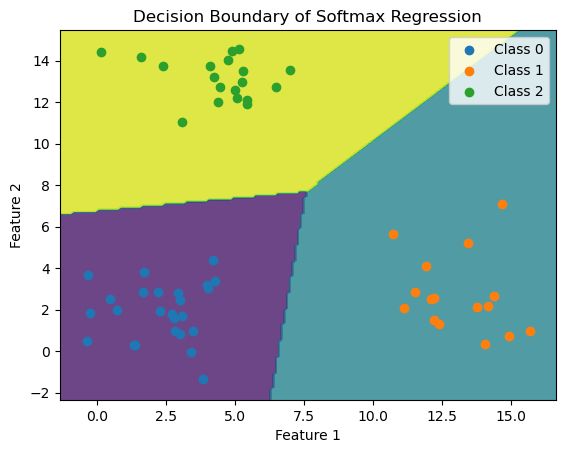

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm vẽ đường ranh giới
def plot_decision_boundary(X, y, weights, bias):
    # Tạo lưới điểm để vẽ đường ranh giới
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Dự đoán nhãn cho từng điểm trên lưới điểm
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = predict(grid_points, weights, bias)
    Z = Z.reshape(xx.shape)

    # Vẽ đường ranh giới
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Vẽ các điểm dữ liệu thuộc từng lớp
    unique_classes = np.unique(y)
    for cls in unique_classes:
        class_samples = X[y == cls]
        plt.scatter(class_samples[:, 0], class_samples[:, 1], label=f'Class {cls}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Softmax Regression')
    plt.legend()
    plt.show()

# Giả định bạn đã có dữ liệu huấn luyện X_train và nhãn y_train tương ứng

# Xác định các tham số huấn luyện
learning_rate = 0.01
num_epochs = 20000

# Huấn luyện mô hình
weights, bias = softmax_regression_train(X_train, y_train, learning_rate, num_epochs)

# Dự đoán nhãn cho dữ liệu kiểm tra X_test
y_test_pred = predict(X_test, weights, bias)

# Tính toán độ chính xác của mô hình trên dữ liệu kiểm tra
acc = accuracy(y_test, y_test_pred)
print(f"Độ chính xác trên dữ liệu kiểm tra: {acc:.2f}")

# Vẽ đường ranh giới
plot_decision_boundary(X_test, y_test, weights, bias)
